In [1]:
import uproot as up
import awkward as ak
import numpy as np
import hist
import mplhep as hep
import matplotlib.pyplot as plt
plt.style.use(hep.style.CMS)
import vector
vector.register_awkward()

In [2]:
Z_files = ["/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/200to400/f28973a4-5f67-47d3-80de-df286f1e3a72.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/200to400/68c2ef97-e813-4728-9afa-9b522a7c5bf9.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/200to400/ceba53b1-2463-43d9-88b9-6b291e314341.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/200to400/1877d683-ea21-4d62-a063-ab1bfe5766ac.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/200to400/0fa9c1b4-4bea-41ce-8282-46c408e10949.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/200to400/8fc07be7-2d1f-4ed6-b8a3-6b16551d2fce.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/200to400/984a4fba-b6cb-4707-87cf-445a709149b6.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/200to400/5b73217b-ef39-4659-89c6-38b39bc3927c.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/200to400/c1fca9c1-d4f4-4b14-a8ad-e5e3cad4d2f9.root", 
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/200to400/8ee7003f-c882-423f-88e6-2162fcd30422.root", ]
        
branches_to_select = ["Jet_pt", "Jet_eta", "Jet_phi","Jet_mass", "Jet_jetId", "Jet_btagDeepFlavB", "MET_pt", "MET_phi"]

Z_arrays = [up.open(f)["Events"].arrays(branches_to_select) for f in Z_files]

all_Z = ak.concatenate(Z_arrays)

In [3]:
all_Z

<Array [{Jet_pt: [269], ...}, ..., {...}] type='1021168 * {Jet_pt: var * fl...'>

In [4]:
z = ak.zip({"pt":all_Z.Jet_pt, "eta":all_Z.Jet_eta, "phi":all_Z.Jet_phi, "mass":all_Z.Jet_mass, "id1":all_Z.Jet_jetId, "id2":all_Z.Jet_btagDeepFlavB, "met_pt":all_Z.MET_pt,"met_phi":all_Z.MET_phi },  with_name = "Momentum4D")
z

<MomentumArray4D [[{pt: 269, eta: -0.492, ...}], ...] type='1021168 * var *...'>

In [5]:
selected_event_z = z[(z.id1 == 2) & (z.pt >20) & (abs(z.eta)< 2.5)]
selected_event_z = selected_event_z[ak.num(selected_event_z)>0]
selected_event_z

<MomentumArray4D [[{pt: 231, eta: -2, ...}], ...] type='6510 * var * Moment...'>

In [6]:
selected_event_z_b = z[(z.id1 == 2) & (z.pt >20) & (abs(z.eta)< 2.5) & (z.id2 > 0.3086)]
selected_event_z_b = selected_event_z_b[ak.num(selected_event_z_b)>0]
selected_event_z_b

<MomentumArray4D [[{pt: 248, eta: -1.2, ...}], ...] type='785 * var * Momen...'>

In [24]:
lumi = 8
sigma = 5946
ni = 1021168 
nf1 = 785
f1 = lumi*sigma*nf1/ni
weights1 = (np.ones_like(ak.flatten(selected_event_z_b.pt)))*f1

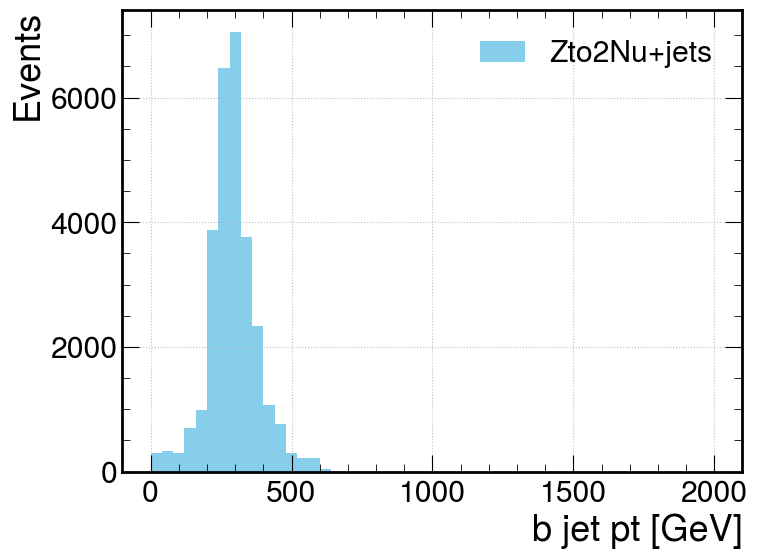

In [25]:
plt.figure(figsize=(8,6))
counts1, bin_edges1, _ = plt.hist(ak.flatten(selected_event_z_b.pt), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue', weights = weights1)
# Labels and legend
plt.xlabel("b jet pt [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid(True)
#plt.savefig('bjet pt',bbox_inches='tight')
plt.show()



In [26]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("bjet_pt_3.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("b_jet_pt_hist1", "bjet pt Histogram", len(bin_edges1)-1, bin_edges1)

# Fill the ROOT histogram with the counts
for i in range(len(counts1)):
    hist1.SetBinContent(i+1, counts1[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()


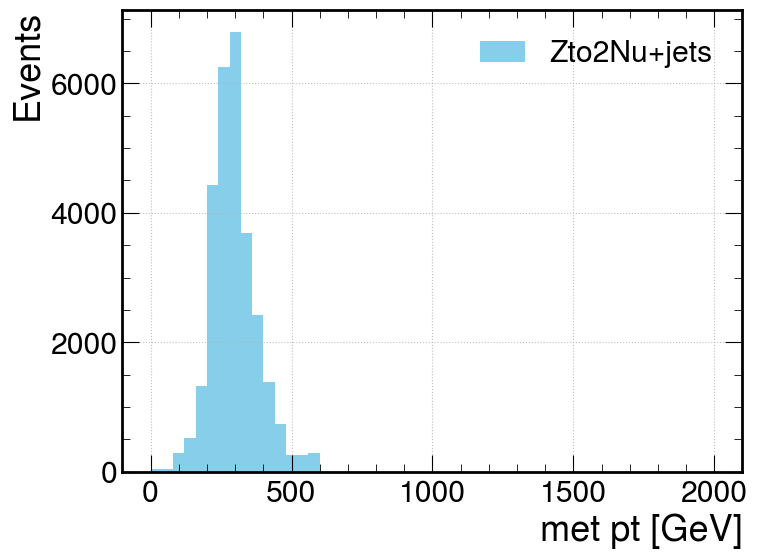

In [27]:
plt.figure(figsize=(8,6))
counts2, bin_edges2,_ = plt.hist(ak.flatten(selected_event_z_b.met_pt), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue',weights = weights1)
# Labels and legend
plt.xlabel("met pt [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid(True)
#plt.savefig('met pt',bbox_inches='tight')
plt.show()

In [28]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("met_3.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "MET pt", len(bin_edges2)-1, bin_edges2)

# Fill the ROOT histogram with the counts
for i in range(len(counts2)):
    hist1.SetBinContent(i+1, counts2[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

In [29]:
z = z[(ak.num(z) >=2)]

sorted_z = z[ak.argsort(z.pt, axis=1, ascending=False)]

# Step 4: Extract leading and subleading
leading_z = sorted_z[:, 0]
subleading_z = sorted_z[:, 1]

# Step 5: Compute invariant mass of dijet system
dijet_mass_z = (leading_z + subleading_z).mass
dijet_pt_z = (leading_z + subleading_z).pt

In [30]:
z

<MomentumArray4D [[{pt: 368, eta: 0.37, ...}, ...], ...] type='727296 * var...'>

In [31]:
print(dijet_mass_z)        
print(leading_z.pt)        
print(subleading_z.pt)    
print(len(dijet_mass_z))
print(dijet_pt_z)
print(len(dijet_mass_z))

[208, 193, 341, 152, 266, 109, 97.6, ..., 479, 268, 55.8, 651, 131, 67.5, 641]
[368, 214, 241, 404, 183, 216, 237, 234, ..., 185, 280, 324, 165, 249, 168, 284]
[21.1, 21.1, 17.7, 17.3, 17, 15.5, 16.5, ..., 21.2, 22, 17.1, 24.3, 60.4, 16.4]
727296
[369, 195, 224, 393, 195, 211, 246, 221, ..., 210, 293, 346, 174, 249, 229, 285]
727296


In [32]:
nf2 = 727296
f2 = lumi*sigma*nf2/ni
weights2 = (np.ones_like(dijet_mass_z))*f2

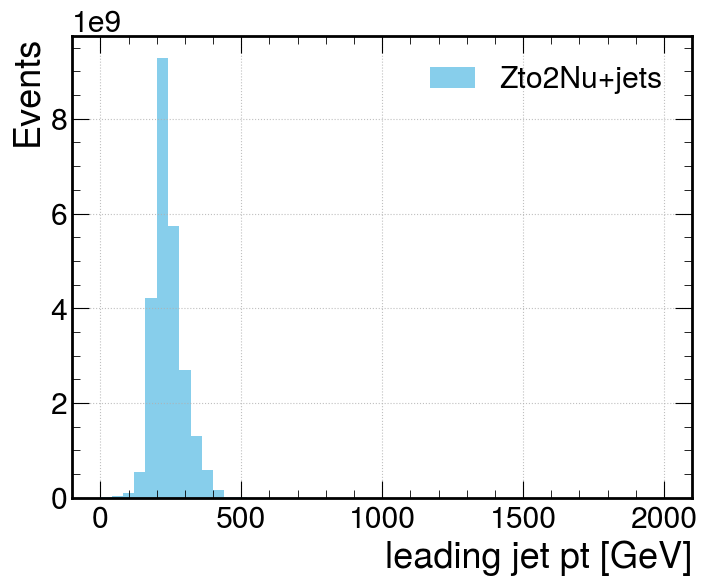

In [33]:
plt.figure(figsize=(8,6))
counts3, bin_edges3,_ = plt.hist(ak.to_numpy(leading_z.pt), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue', weights = weights2)

# Labels and legend
plt.xlabel("leading jet pt [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [34]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("leading_pt_3.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Leading jet pt", len(bin_edges3)-1, bin_edges3)

# Fill the ROOT histogram with the counts
for i in range(len(counts3)):
    hist1.SetBinContent(i+1, counts3[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

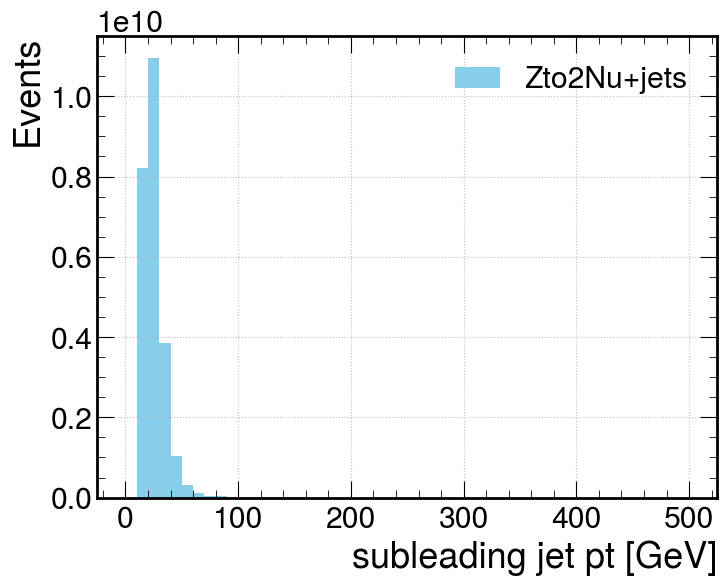

In [35]:
plt.figure(figsize=(8,6))
counts4, bin_edges4,_ = plt.hist(ak.to_numpy(subleading_z.pt), bins=50, range=(0, 500), label="Zto2Nu+jets",color='skyblue', weights = weights2)

# Labels and legend
plt.xlabel("subleading jet pt [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [36]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("subleading_pt_3.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Subleading jet pt", len(bin_edges4)-1, bin_edges4)

# Fill the ROOT histogram with the counts
for i in range(len(counts4)):
    hist1.SetBinContent(i+1, counts4[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

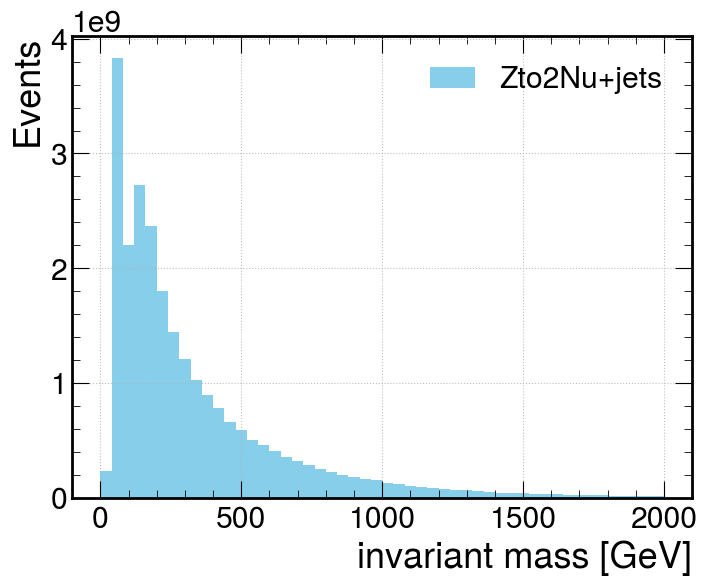

In [37]:
plt.figure(figsize=(8,6))
counts5, bin_edges5,_=plt.hist(ak.to_numpy(dijet_mass_z), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue',weights = weights2)

# Labels and legend
plt.xlabel("invariant mass [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [38]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("mass3.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Invariant mass", len(bin_edges5)-1, bin_edges5)

# Fill the ROOT histogram with the counts
for i in range(len(counts5)):
    hist1.SetBinContent(i+1, counts5[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

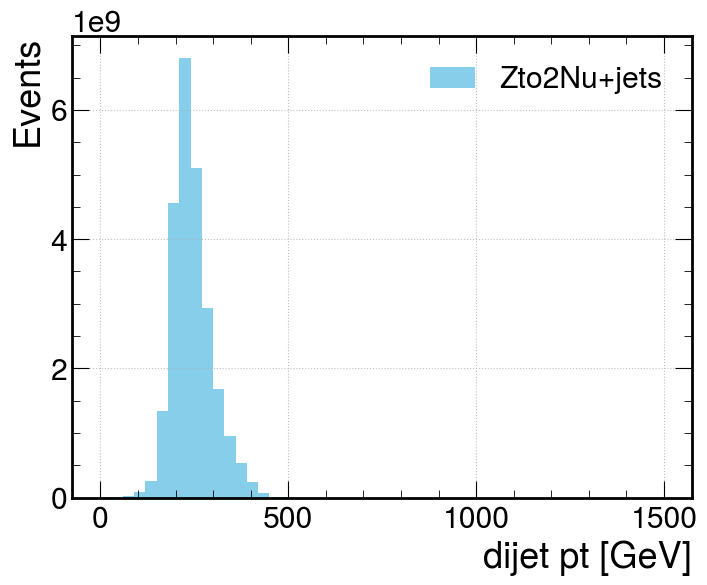

In [39]:
plt.figure(figsize=(8,6))
counts6, bin_edges6,_ = plt.hist(ak.to_numpy(dijet_pt_z), bins=50, range=(0, 1500), label="Zto2Nu+jets",color='skyblue',weights = weights2)

# Labels and legend
plt.xlabel("dijet pt [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [40]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("dijet3.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Dijet pt", len(bin_edges6)-1, bin_edges6)

# Fill the ROOT histogram with the counts
for i in range(len(counts6)):
    hist1.SetBinContent(i+1, counts6[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()